In [1]:
import qevo
from qevo import *
import numpy as np
import matplotlib.pyplot as plt
import sympy

# Get the circuit

In [2]:
p = Individual(F=0.99, history=History.survivor, weights=(1, 0), ops=[
           CNOTPerm([1, 2], (0, 1, 3, 2), (0, 3, 1, 2), 3, 1),
           CNOTPerm([0, 1], (0, 3, 1, 2), (0, 1, 2, 3), 3, 1),
           AMeasurement(2, 1, 3, 0.99, 1, None),
           CNOTPerm([1, 2], (0, 1, 3, 2), (0, 3, 2, 1), 3, 1),
           AMeasurement(1, 2, 3, 0.99, 1, None),
           AMeasurement(2, 3, 3, 0.99, 1, None),
           CNOTPerm([0, 1], (0, 3, 1, 2), (0, 2, 3, 1), 3, 1),
           CNOTPerm([1, 2], (0, 3, 2, 1), (0, 2, 3, 1), 3, 1),
           AMeasurement(1, 2, 3, 0.99, 1, None),
           AMeasurement(2, 3, 3, 0.99, 1, None)])

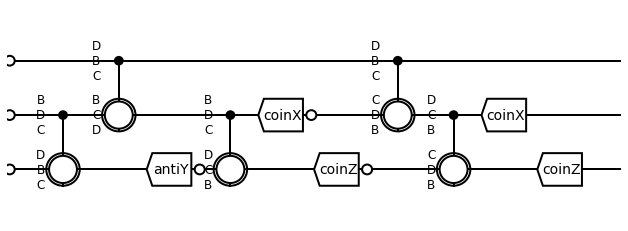

In [4]:
individual2plot(p);

# Get the non-normalized symbolic ABCD weights

In [6]:
polynomials=p.ABCD_sym_notnorm()

done10


# Get the exact symbolic probability of success for a perfect circuit

In [10]:
perfect_circuit_probability = sum(polynomials).as_expr().subs(epsilon_g,0).subs(epsilon_m,0)
perfect_circuit_probability_function = sympy.lambdify(q,perfect_circuit_probability)

In [17]:
qs = np.linspace(0,1/3,100)
F0s = 1-3*qs
probs = perfect_circuit_probability_function(qs)

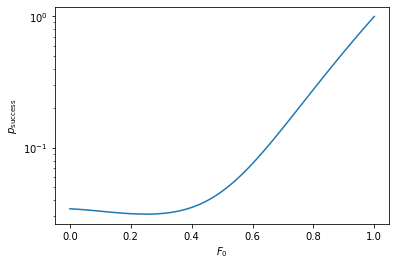

In [25]:
plt.semilogy(F0s, probs)
plt.xlabel('$F_0$')
plt.ylabel(r'$p_\mathrm{success}$');

# Get the symbolic final fidelity for a perfect circuit to leading order, next-to-leading order and next-to-next-to-leading order

In [26]:
# This is probably a stupid inefficient way to do it. It took about a minute on my computer.
eq0 = expand_ABCDsymnotnorm(polynomials, beyond_leading_order=0)
eq1 = expand_ABCDsymnotnorm(polynomials, beyond_leading_order=1)
eq2 = expand_ABCDsymnotnorm(polynomials, beyond_leading_order=2)

In [30]:
# Extract only the fidelities
Fout_order0 = eq0[0].as_expr().subs(eps_p2,0).subs(eps_η,0)
Fout_order1 = eq1[0].as_expr().subs(eps_p2,0).subs(eps_η,0)
Fout_order2 = eq2[0].as_expr().subs(eps_p2,0).subs(eps_η,0)

In [35]:
Fout_order0

-42*q**3 - 5*q**2 + 1

In [36]:
Fout_order1

-234*q**4 - 42*q**3 - 5*q**2 + 1

In [37]:
Fout_order2

-952*q**5 - 234*q**4 - 42*q**3 - 5*q**2 + 1

In [38]:
Fout_order0_f = sympy.lambdify(q,Fout_order0)
Fout_order1_f = sympy.lambdify(q,Fout_order1)
Fout_order2_f = sympy.lambdify(q,Fout_order2)
Fout_order0_calc = Fout_order0_f(qs)
Fout_order1_calc = Fout_order1_f(qs)
Fout_order2_calc = Fout_order2_f(qs)

# Get the numeric final fidelity for a perfect circuit

In [52]:
# We skip the last one because that causes a divide by zero error (when F0=0)
Fout_numeric = [p.copy(F=_f,P2=1-1e-6,Mη=1-1e-6).fidelity() for _f in F0s[:-1]]

# Compare exact numerics to symbolic expressions to various orders

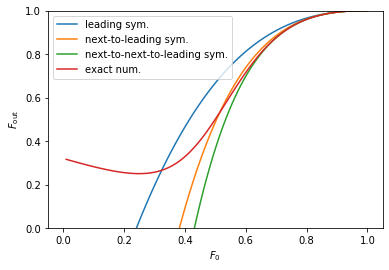

In [60]:
plt.plot(F0s,Fout_order0_calc)
plt.plot(F0s,Fout_order1_calc)
plt.plot(F0s,Fout_order2_calc)
plt.plot(F0s[:-1],Fout_numeric)
plt.ylim(0,1)
plt.legend(['leading sym.','next-to-leading sym.','next-to-next-to-leading sym.','exact num.'])
plt.xlabel('$F_0$')
plt.ylabel(r'$F_\mathrm{out}$');

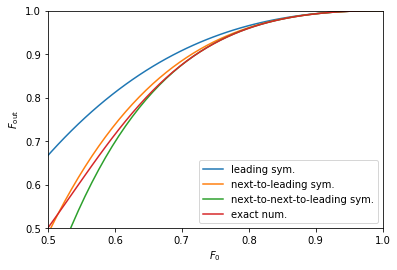

In [59]:
plt.plot(F0s,Fout_order0_calc)
plt.plot(F0s,Fout_order1_calc)
plt.plot(F0s,Fout_order2_calc)
plt.plot(F0s[:-1],Fout_numeric)
plt.ylim(0.5,1)
plt.xlim(0.5,1)
plt.legend(['leading sym.','next-to-leading sym.','next-to-next-to-leading sym.','exact num.'])
plt.xlabel('$F_0$')
plt.ylabel(r'$F_\mathrm{out}$');